## Data Cleaning and Preprocessing Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import re
import string

In [3]:
df=pd.read_csv("../data/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Text Cleaning

In [4]:
import nltk
from nltk.corpus import stopwords

In [5]:
stops=set(stopwords.words('english'))

In [6]:
from nltk.tokenize import wordpunct_tokenize

In [7]:
def clean_text(string):
    string_clean=string.strip()
    string_clean=string_clean.replace("<br />","")
    string_clean=wordpunct_tokenize(string_clean)
    string_clean=[word for word in string_clean if word.lower() not in stops]
    string_clean=" ".join(string_clean)
    return string_clean.lower()

In [8]:
df['clean_review']=df['review'].apply(lambda x:clean_text(x))

In [9]:
df['clean_review'].head(1).values

array(["one reviewers mentioned watching 1 oz episode ' hooked . right , exactly happened . first thing struck oz brutality unflinching scenes violence , set right word go . trust , show faint hearted timid . show pulls punches regards drugs , sex violence . hardcore , classic use word . called oz nickname given oswald maximum security state penitentary . focuses mainly emerald city , experimental section prison cells glass fronts face inwards , privacy high agenda . em city home many .. aryans , muslims , gangstas , latinos , christians , italians , irish .... scuffles , death stares , dodgy dealings shady agreements never far away . would say main appeal show due fact goes shows ' dare . forget pretty pictures painted mainstream audiences , forget charm , forget romance ... oz ' mess around . first episode ever saw struck nasty surreal , ' say ready , watched , developed taste oz , got accustomed high levels graphic violence . violence , injustice ( crooked guards ' sold nickel , inm

In [10]:
df.iloc[-1,:]['clean_review']

"one expects star trek movies high art , fans expect movie good best episodes . unfortunately , movie muddled , implausible plot left cringing - far worst nine ( far ) movies . even chance watch well known characters interact another movie ' save movie - including goofy scenes kirk , spock mccoy yosemite . would say movie worth rental , hardly worth watching , however true fan needs see movies , renting movie way ' see - even cable channels avoid movie ."

In [11]:
df

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production . filming techniqu...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically ' family little boy ( jake ) thinks ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei ' "" love time money "" visually s..."
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job . ' creative orig...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"bad plot , bad dialogue , bad acting , idiotic..."
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...
49998,I'm going to have to disagree with the previou...,negative,' going disagree previous comment side maltin ...


## Define a Vocabulary

In [12]:
df['num_words']=df['clean_review'].apply(lambda x: len(x.split(" ")))

In [13]:
df.drop('review',axis=1,inplace=True)

In [14]:
df

,sentiment,clean_review,num_words
0,positive,one reviewers mentioned watching 1 oz episode ...,214
1,positive,wonderful little production . filming techniqu...,112
2,positive,thought wonderful way spend time hot summer we...,110
3,negative,basically ' family little boy ( jake ) thinks ...,88
4,positive,"petter mattei ' "" love time money "" visually s...",157
...,...,...,...
49995,positive,thought movie right good job . ' creative orig...,112
49996,negative,"bad plot , bad dialogue , bad acting , idiotic...",71
49997,negative,catholic taught parochial elementary schools n...,139
49998,negative,' going disagree previous comment side maltin ...,138


In [15]:
df['num_words'].sum()

7828123

C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_words', ylabel='Density'>

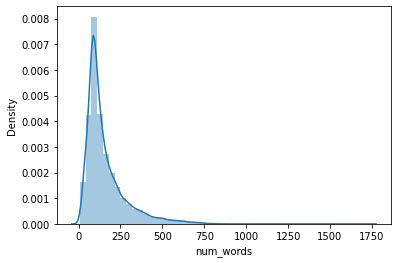

In [16]:
sns.distplot(df[df['sentiment']=='positive']['num_words'])

C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_words', ylabel='Density'>

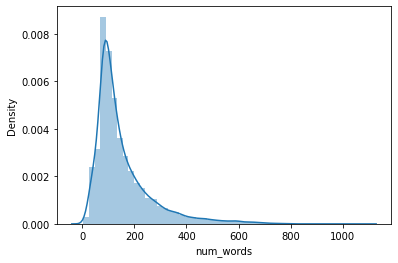

In [17]:
sns.distplot(df[df['sentiment']=='negative']['num_words'])

We have an average of about 100 meaningful words in both positive and negative movie reviews

C:\Users\Ashwin\miniconda3\envs\Tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

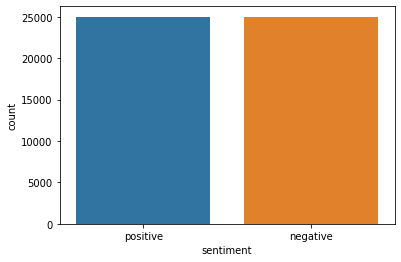

In [18]:
sns.countplot(df['sentiment'])

Balanced dataset

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train,test = train_test_split(df, test_size=0.3, random_state=42)
test,validation=train_test_split(test,test_size=0.5,random_state=42)

In [21]:
train.to_csv('../input/train.csv')
test.to_csv('../input/test.csv')
validation.to_csv('../input/validation.csv')

In [22]:
reviews=" ".join(train['clean_review'].values)

In [23]:
tokens=set(reviews.split(" "))

In [24]:
len(tokens)

91314

In [25]:
vocabulary="\n".join(tokens)

In [26]:
file=open('../input/vocabulary.txt','w')
file.write(vocabulary)
file.close()